In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Versão em português (PT-BR) (Responses)17-02.xlsx',index_col=[0])

In [6]:
df22 = pd.read_excel('Versão em português (PT-BR) (Responses)17-02.xlsx',index_col=[0])

In [3]:
df.head()


,Concorda em participar do estudo?,"As estratégias para uma economia circular serão avaliadas segundo um conjunto de critérios/indicadores, considerados qualitativos, porque abrangem múltiplas dimensões e subjetividade (ambiental, social e econômica). Para tanto, elaboramos uma escala ordinal, que varia de 1 (nível mais baixo) a 5 (nível mais alto). Por favor, avalie cada estratégia considerando sua percepção com base nessa escala (1-5). As seções seguintes lhe questionarão sobre a sua ""percepção"" sobre quanto cada estratégia contribui para a transição para uma economia circular em nível macro, com base na escala conforme apresentada abaixo.","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Está em conformidade com os regulamentos regionais e nacionais]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Ajuda a aumentar a aceitação pública da economia circular]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Aumenta a absorção da força de trabalho regional]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Previne o descarte incorreto de resíduos]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Contribui para a preservação do meio ambiente]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Tem um custo para a implementação]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Tem um custo para ser mantida em operação]","1. COLABORAÇÃO ENTRE EMPRESAS: Tem o propósito de organizar a colaboração e as relações de negócios entre empresas na economia circular, envolve o compartilhamento de recursos e de informações. Nesse sentido, regras são necessárias porque as interdependências aumentam e se tornam mais específicas quando comparadas à colaboração na economia linear. Esta estratégia: [Tem dificuldade de implementação, devido ao conh

### Ajuste das colunas
- Texto demasiadamente grande, provavelmente devido a importação do google forms

In [4]:
#Tamanho
df.columns.shape

(250,)

In [7]:
colunas = df22.columns
col2 = df.columns

`Agrupamento das questões pelos grupos informados nos cabeçalhos`

In [8]:
cont=0
for itens in colunas:
    if '8. ' in itens[0:]:
        colunas.values[cont] = (itens.replace('Esta  estratégia','Esta estratégia'))
    cont+=1

In [9]:
cont = 2 
for itens in colunas[2:]:
    if '[' in itens[:-1]:
        #print(cont)
        init = itens.find(':')
        pos = itens.find('Esta estratégia')
        #print(itens[:init]+ ':' + ' '+ itens[pos:])
        colunas.values[cont] = (itens[:init]+ ':' + ' '+ itens[pos:])
    cont+=1

In [10]:
cont = 0 
for itens in col2[0:]:
    if '[' in itens[:-1]:
        #print(cont)
        init = itens.find('.')
        #print(itens[:init]+ ':' + ' '+ itens[pos:])
        col2.values[cont] = ('M'+itens[0:init])
    cont+=1

In [11]:
colunas.shape

(250,)

In [12]:
col2.shape

(250,)

In [13]:
df.columns = col2

`Deleção da coluna 1`

In [14]:
del(df['As estratégias para uma economia circular serão avaliadas segundo um conjunto de critérios/indicadores, considerados qualitativos, porque abrangem múltiplas dimensões e subjetividade (ambiental, social e econômica). Para tanto, elaboramos uma escala ordinal, que varia de 1 (nível mais baixo) a 5 (nível mais alto). Por favor, avalie cada estratégia considerando sua percepção com base nessa escala (1-5). As seções seguintes lhe questionarão sobre a sua "percepção" sobre quanto cada estratégia contribui para a transição para uma economia circular em nível macro, com base na escala conforme apresentada abaixo.'])

### Feature que contém a localização dos entrevistados

In [15]:
df['Em qual país, estado e cidade você reside?'].value_counts()

Brasil                                     11
Brasil, DF, Brasília                        7
Brasil, Distrito Federal, Brasília          4
São Paulo                                   3
Brazil                                      3
Brasil, Brasília-DF                         2
Brasil, Distrito Federal                    2
Brasil     SãoPaulo     São Paulo           2
BRASIL                                      2
Brasil, Rio Grande do Sul, Porto Alegre     2
Recife/Pernambuco/Brasil                    1
Brasil, Paraíba, João Pessoa                1
Holanda, Amsterdam                          1
Brasil, DF, Brasília                        1
Porto, Portugal                             1
Brasil Rio de Janeiro RJ                    1
Goiás Iporá                                 1
Madri, Espanha                              1
Dois Vizinhos - Paraná / Brasil             1
Brasil DF                                   1
Brasil, Tocantins, Gurupi                   1
Brasilia, DF, Brasil              

In [16]:
def organiza_localizacao(frase):
    separadores = ['-',',','.',';','--','_','/',' e ']
    for sep in separadores:
        if sep in frase:
            frase = frase.split(sep)
    cont=0
    for it in frase:
        for sep in separadores:
            if sep in it:
                frase[cont] = it.split(sep)
        cont+=1
    return frase

In [17]:
df['Em qual país, estado e cidade você reside?'] = df['Em qual país, estado e cidade você reside?'].apply(organiza_localizacao)
df.rename({'Em qual país, estado e cidade você reside?':'Localidade'},axis=1,inplace=True)

In [18]:
df['Localidade']

Timestamp
2020-05-22 01:42:26.241                           [Brasília, DF]
2020-05-22 07:36:04.785                                   Brasil
2020-05-22 12:39:59.698               [Brazil,  ES,  São Mateus]
2020-05-22 19:16:55.925    [[Chapecó,  Santa Catarina],  Brasil]
2020-05-23 18:33:24.220    [Brasil, [ Santa Catarina, Chapecó ]]
                                           ...                  
2020-08-06 14:34:28.106                                   Brazil
2020-08-13 16:06:14.479                [[Brasil,  Brasília], DF]
2020-05-28 19:20:41.809                                   Brasil
2020-08-06 14:34:28.106                                   Brazil
2020-08-13 16:06:14.479                [[Brasil,  Brasília], DF]
Name: Localidade, Length: 72, dtype: object

In [19]:
df['Localidade'][7][0]

'Brasil'

In [21]:
locais = df['Localidade']
locais = pd.DataFrame(locais)

In [22]:
locais['col1'] = locais['Localidade']
locais['col2'] = locais['col1']
#locais['col3'] = locais['col1']

In [23]:
from distutils.log import error
from unittest import skip

cont=0
for itens in locais['Localidade']:
    if (type(itens)!=str) and (len(itens)>0):
        locais['col1'][cont] = itens[0]
        locais['col2'][cont] = itens[1]

    else:
        locais['col1'][cont] = itens
        locais['col2'][cont] = ''

    cont+=1

In [24]:
locais

,Localidade,col1,col2
Timestamp,,,
2020-05-22 01:42:26.241,"[Brasília, DF]",Brasília,DF
2020-05-22 07:36:04.785,Brasil,Brasil,
2020-05-22 12:39:59.698,"[Brazil, ES, São Mateus]",Brazil,ES
2020-05-22 19:16:55.925,"[[Chapecó, Santa Catarina], Brasil]","[Chapecó, Santa Catarina]",Brasil
2020-05-23 18:33:24.220,"[Brasil, [ Santa Catarina, Chapecó ]]",Brasil,"[ Santa Catarina, Chapecó ]"
...,...,...,...
2020-08-06 14:34:28.106,Brazil,Brazil,
2020-08-13 16:06:14.479,"[[Brasil, Brasília], DF]","[Brasil, Brasília]",DF
2020-05-28 19:20:41.809,Brasil,Brasil,


### `Substituição da Escala Linkert e Binário`

In [25]:
cont2=0
for coluna in df:
    print(df.iloc[:,cont2].value_counts())
    cont2+=1

Sim    66
Yes     6
Name: Concorda em participar do estudo?, dtype: int64
Neutro         24
Alto           16
Baixo          15
Muito alto      9
Muito baixo     2
High            2
Neutral         2
Very high       2
Name: M1, dtype: int64
Alto           31
Muito alto     20
Neutro         10
Baixo           4
High            2
Low             2
Very high       2
Muito baixo     1
Name: M1, dtype: int64
Alto           25
Neutro         18
Muito alto     15
Baixo           7
High            4
Low             2
Muito baixo     1
Name: M1, dtype: int64
Muito alto    29
Alto          24
Neutro         9
Baixo          4
High           4
Very low       2
Name: M1, dtype: int64
Muito alto     33
Alto           24
Neutro          7
High            2
Neutral         2
Very high       2
Baixo           1
Muito baixo     1
Name: M1, dtype: int64
Alto           33
Neutro         15
Baixo           8
Muito alto      8
Muito baixo     2
High            2
Very high       2
Neutral         2
Name: M

In [26]:
def ordinal_encoder(termo):
    if termo == 'Muito baixo' or termo == 'Very low':
        termo = 1
    if termo == 'Baixo' or termo == 'Low':
        termo = 2
    if termo == 'Neutro' or termo == 'Neutral':
        termo = 3
    if termo == 'Alto' or termo == 'High':
        termo = 4
    if termo == 'Muito alto' or termo == 'Very high':
        termo = 5
    if termo == 'Sim' or termo == 'Yes':
        termo = 1
    if termo == 'Não' or termo == 'No':
        termo = 1
    return(termo)

In [27]:
cont3=0
for coluna in df:
    df.iloc[:,cont3] = df.iloc[:,cont3].apply(ordinal_encoder)
    cont3+=1

### `Ajuste da Feature: Tamanho das empresas`

In [28]:
df.rename({'Qual o tamanho da sua empresa/organização, em termos de número de funcionários?':'porte_empresa'},axis=1,inplace=True)

In [29]:
df.porte_empresa.value_counts()

Grande  - mais de 250 funcionários                              35
Micro - até 10 funcionários                                      9
Large-sized enterprise, more than 250 employees                  4
Médias  - de 51 a 250 funcionários                               4
Empreendedor Individual                                          3
Pequena - de 11 até 50 funcionários                              2
Small-sized enterprise, between 11 and 50 employees              2
Universidade                                                     2
não tenho empresa                                                1
Pesquisador                                                      1
Não tenho empresa.                                               1
Não se aplica                                                    1
Empreendedor Individual, Pequena - de 11 até 50 funcionários     1
universidade                                                     1
Universidade                                                  

In [30]:
def patternizer(x):
    x=str(x)
    if ('Grande' in x) or ('Big' in x) or ('Large' in x) or ('30000' in x):
        x='Grande'
    if ('Média' in x) or ('Medium' in x):
        x='Média'
    if ('Pequena' in x) or ('Small' in x) or ('Micro' in x):
        x='Pequena/Micro'
    if ('Individual' in x):
        x='Individual'
    if ('Não' in x) or ('não' in x):
        x='Sem empresa'
    if ('Universidade' in x) or ('universidade' in x) or ('Pesquisador' in x) or ('estudante' in x):
        x='Acadêmico'
    return (x)

In [31]:
df['porte_empresa'] = df['porte_empresa'].apply(patternizer)

### `Separação do dataset de questões`

In [33]:
df_questoes = df.iloc[:,1:-8]

In [34]:
df_questoes

,M1,M1,M1,M1,M1,M1,M1,M1,M1,M1,...,M24,M24,M24,M24,M24,M24,M24,M24,M24,M24
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-22 01:42:26.241,4,4,5,4,4,4,2,4,1,1,...,4,4,5,5,5,4,3,3,1,1
2020-05-22 07:36:04.785,3,4,2,4,3,1,3,4,3,4,...,3,3,3,3,3,3,3,3,3,3
2020-05-22 12:39:59.698,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2020-05-22 19:16:55.925,2,4,2,5,4,4,4,5,5,4,...,2,2,2,2,2,2,2,2,2,2
2020-05-23 18:33:24.220,2,3,2,2,2,3,4,5,5,2,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06 14:34:28.106,3,2,2,1,3,5,5,5,5,3,...,3,4,4,4,4,2,2,2,5,4
2020-08-13 16:06:14.479,5,5,4,4,5,3,3,3,3,3,...,4,4,4,5,5,4,4,4,4,5
2020-05-28 19:20:41.809,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


### Somatório do Linkert

In [35]:
df_means = pd.DataFrame()

In [36]:
df_means = df_questoes.groupby(level=0,axis=1).mean().add_suffix('_mean')

C:\Users\efvs\AppData\Local\Temp\ipykernel_26600\3939935063.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_means = df_questoes.groupby(level=0,axis=1).mean().add_suffix('_mean')


In [37]:
sorted(df.index)[40:50] == sorted(df_means.index)[40:50]

False

In [42]:
print(sorted(df.index)[40:50])
print(sorted(df_means.index)[40:50])

[Timestamp('2020-08-05 00:38:05.470000'), Timestamp('2020-08-05 08:15:51.174000'), Timestamp('2020-08-05 10:42:19.121000'), Timestamp('2020-08-05 13:31:00.190000'), Timestamp('2020-08-05 13:57:14.271000'), Timestamp('2020-08-06 03:05:21.930000'), Timestamp('2020-08-06 14:34:28.106000'), Timestamp('2020-08-06 14:34:28.106000'), Timestamp('2020-08-06 15:15:14.854000'), Timestamp('2020-08-06 15:25:48.332000')]
[Timestamp('2020-08-05 00:38:05.470000'), Timestamp('2020-08-05 08:15:51.174000'), Timestamp('2020-08-05 10:42:19.121000'), Timestamp('2020-08-05 13:31:00.190000'), Timestamp('2020-08-05 13:57:14.271000'), Timestamp('2020-08-06 03:05:21.930000'), Timestamp('2020-08-06 15:15:14.854000'), Timestamp('2020-08-06 15:25:48.332000'), Timestamp('2020-08-06 15:54:24.594000'), Timestamp('2020-08-07 10:25:23.183000')]


Houve a deleção das linhas referentes aos Timestamps:

    - '2020-08-06 14:34:28.106000'
    - '2020-08-06 14:34:28.106000'

Mudando os nomes, para garantir correta ordenação

In [41]:
df_means.rename({
    'M1_mean':'M01_mean',
    'M2_mean':'M02_mean',
    'M3_mean':'M03_mean',
    'M4_mean':'M04_mean',
    'M5_mean':'M05_mean',
    'M6_mean':'M06_mean',
    'M7_mean':'M07_mean',
    'M8_mean':'M08_mean',
    'M9_mean':'M09_mean'
},axis=1,inplace=True)

In [44]:
df_means = df_means[sorted(df_means.columns)]

### `Correlação entre as questões`

<AxesSubplot:title={'center':'Matriz de correlação de Pearson'}>

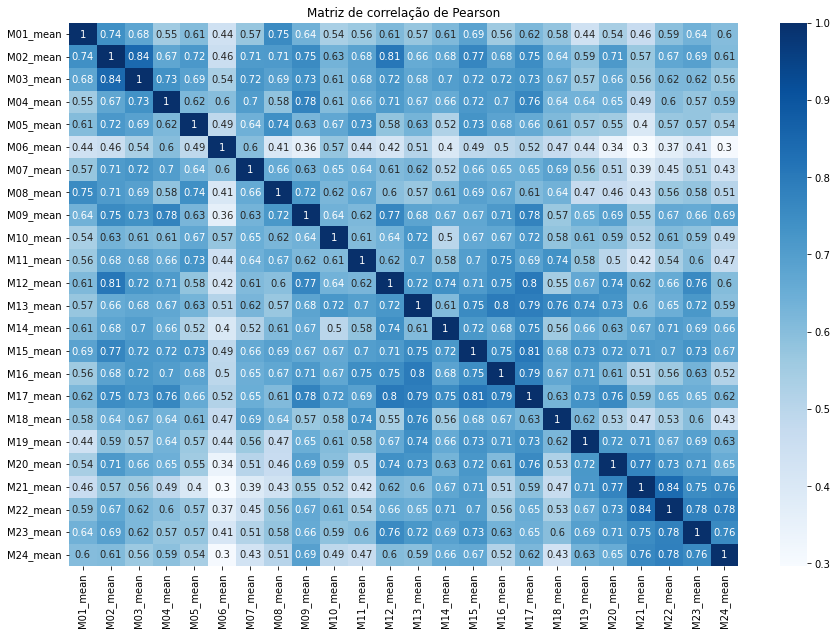

In [45]:
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title("Matriz de correlação de Pearson")
sns.heatmap(df_means.corr(),annot=True,cmap="Blues")

In [47]:
df['porte_empresa'].shape

(72,)

In [49]:
df_means['porte'] = df['porte_empresa'].drop(['2020-08-06 14:34:28.106000','2020-08-06 14:34:28.106000'],axis=0)

In [66]:
df_means['lvl_conhecimento']=df['MComo você avalia o seu nível de conhecimento sobre economia circular [Nível de conhecimento'].drop(['2020-08-06 14:34:28.106000','2020-08-06 14:34:28.106000'],axis=0)

In [74]:
df22['Como você avalia o seu nível de conhecimento sobre economia circular [Nível de conhecimento: ]'].replace({'Very low':'Muito baixo','Neutral':'Neutro','High':'Alto','Very high':'Muito alto'}, inplace=True)
df_means['lvl_conhecimento']=df22['Como você avalia o seu nível de conhecimento sobre economia circular [Nível de conhecimento: ]'].drop(['2020-08-06 14:34:28.106000','2020-08-06 14:34:28.106000'],axis=0)

### Boxplots

- 1. `Média de respostas das questões de acordo com ocupação`
- 2. `Média de respostas das questões de acordo com o grau de conhecimento do tema`

In [69]:
#1
import plotly.express as px

fig = px.box(df_means,y=df_means.columns[0:-1] ,color='porte')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [76]:
#2
import plotly.express as px

fig = px.box(df_means,y=df_means.columns[0:-2] ,color='lvl_conhecimento')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

Comparando nivel alto com muito baixo, quem tem nível muito baixo, tende a ter uma percepção menor dos impactos das ações (distribuição média de respostas mais baixa)

In [77]:
df.to_csv('ptbr_tratado.csv')